# Lý Thuyết

# Thực Hành

## Tự Xây Dựng

In [37]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.backends.backend_pdf import PdfPages
import random
np.random.seed(18)

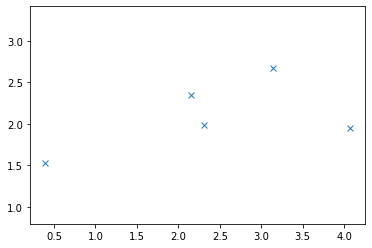

In [42]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(means[0], cov, 5).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()


In [79]:
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
np.random.multivariate_normal?
original_label, original_label.shape

(array([0, 0, 0, ..., 2, 2, 2]), (1500,))

In [83]:
def kmeans_display(X, label, filename = 'data.pdf'):
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    with PdfPages(filename) as pdf:       
        kwargs = {"markersize": 5, "alpha": .8, "markeredgecolor": 'k'}
        plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
        plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
        plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

        plt.axis([-3, 14, -2, 10])
        plt.axis('scaled')
        plt.plot()
        pdf.savefig(bbox_inches='tight')
        plt.show()

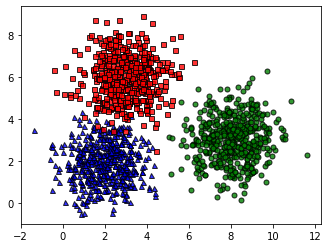

In [84]:
kmeans_display(X, original_label)

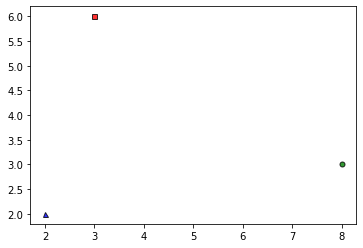

In [85]:
X
np_array_means=np.array(means)
np_array_original_label=np.array([0,1,2])
np_array_means.shape, X.shape
kmeans_display(np_array_means, np_array_original_label) # tes thử vị trí của means

In [4]:
def kmeans_init_centroids(X, k):
    # randomly pick k rows of X ans initial centroids
    return X[np.random.choice(X.shape[0], k)]

def kmeans_assign_labels(X, centroids):
    # calculate pairwise distances btw data and centroids
    D = cdist(X, centroids)
    # return index of the closest centroid
    return np.argmin(D, axis = 1)

def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        Xk = X[labels == k, :]
        # take average
        centroids[k,:] = np.mean(Xk, axis = 0)
    return centroids

def has_converged(centroids, new_centroids):
    # return True if two sets of centroids as the same
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

In [5]:

def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
        	break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)

Centers found by our algorithm:
 [[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]


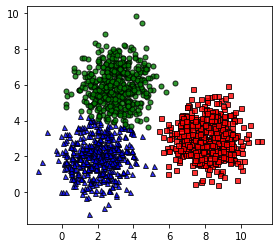

In [6]:
(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1], 'res.pdf')

## Kết quả tìm được bằng thư viện scikit-learn

Centers found by scikit-learn:
[[8.07476866 3.01494931]
 [1.98459808 1.96989964]
 [3.02801296 5.96081708]]


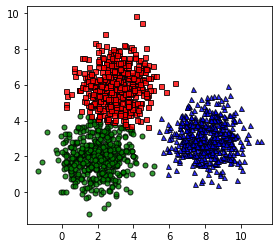

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(model.cluster_centers_)
pred_label = model.predict(X)
kmeans_display(X, pred_label, 'res_scikit.pdf')

In [16]:
from voronoi import voronoi_finite_polygons_2d
vor = Voronoi(centroids[-1])
def kmeans_display_progress(X, centroids, labels, it, filename = 'ex.pdf', saving = False):
    label = labels[it] # label at iteration it 
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
#     filename = pre + '_' + str(it) + '.pdf'
    with PdfPages(filename) as pdf:
        # draw data points with color 
        kwargs = {"markersize": 5, "alpha": 1, "markeredgecolor": 'k'}
        plt.plot(X0[:, 0], X0[:, 1], 'b^', **kwargs)
        plt.plot(X1[:, 0], X1[:, 1], 'go', **kwargs)
        plt.plot(X2[:, 0], X2[:, 1], 'rs', **kwargs)

        # draw centroids 
        points = centroids[it]
        kwargs = {"markersize": 15, "markeredgecolor": 'k'}
        animlist = plt.plot(points[0, 0], points[0, 1], 'y^', **kwargs)
        animlist = plt.plot(points[1, 0], points[1, 1], 'yo', **kwargs)
        animlist = plt.plot(points[2, 0], points[2, 1], 'ys', **kwargs)

        # draw color for each voronoi region 
        colors = ['b', 'g', 'r']

        vor = Voronoi(points)
        regions, vertices = voronoi_finite_polygons_2d(vor, radius = 1000)
        for i,region in enumerate(regions):
            polygon = vertices[region]
            animlist = plt.fill(*zip(*polygon), alpha=.2, color = colors[i])
        plt.axis('scaled')
        plt.title('iteration: %d/%d' %(it+1, len(labels)))
        plt.axis([-2, 11, -2, 10])
        if saving:
            pdf.savefig(bbox_inches='tight')
        plt.show()

ImportError: cannot import name 'voronoi_finite_polygons_2d' from 'voronoi' (C:\Users\hoang\anaconda3\lib\site-packages\voronoi\__init__.py)

TypeError: cannot unpack non-iterable Figure object

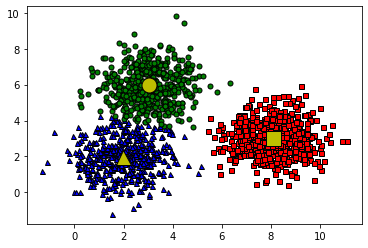

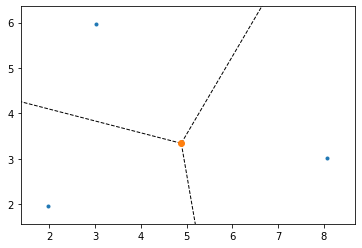

In [11]:
iters = range(5,6)
for it in iters:
    filename = 'ex_' + str(it) + 'notitle.pdf'
    kmeans_display_progress(X, centroids, labels, it, filename, saving = True)

In [12]:
for i in range(6):
    np.random.seed(9*i)
    (centroids, labels, it) = kmeans(X, K)
    print('seed number:', 9*i, 'number of iterations:', len(labels))

seed number: 0 number of iterations: 8
seed number: 9 number of iterations: 8
seed number: 18 number of iterations: 9
seed number: 27 number of iterations: 20
seed number: 36 number of iterations: 7
seed number: 45 number of iterations: 8


In [13]:
for i in range(60):
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X, K)
    print(centroids[-1])
#     print('seed number:', 9*i, 'number of iterations:', len(labels))

[[8.78046073 2.78155578]
 [7.15025799 3.32261946]
 [2.48627752 3.975271  ]]
[[3.02702878 5.95686115]
 [1.9834967  1.96588127]
 [8.07476866 3.01494931]]
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
[[8.07476866 3.01494931]
 [1.9834967  1.96588127]
 [3.02702878 5.95686115]]
[[3.02702878 5.95686115]
 [8.07476866 3.01494931]
 [1.9834967  1.96588127]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[8.07476866 3.01494931]
 [3.02702878 5.95686115]
 [1.9834967  1.96588127]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[1.9834967  1.96588127]
 [3.02702878 5.95686115]
 [8.07476866 3.01494931]]
[[1.9834967 

10


TypeError: cannot unpack non-iterable Figure object

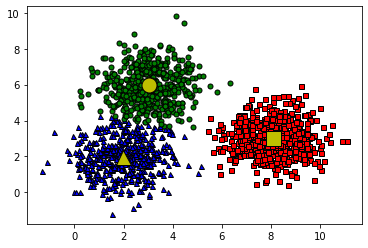

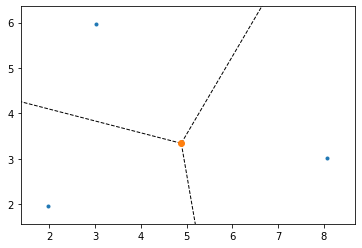

In [14]:
for i in [10, 31, 27]:
    np.random.seed(i)
    (centroids, labels, it) = kmeans(X, K)
    it = len(labels) - 1
    print(i)
    filename = 'dif_res' + str(i) + '.pdf'
    kmeans_display_progress(X, centroids, labels, it, filename, saving = True)